In [268]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [269]:
def balancear(df, target_col='target', oversample=False):
  """ 
  Balancea un DataFrame df basado en la columna target.
  """
  counts = df[target_col].value_counts()
  
  clase_mayoritaria = counts.idxmax()
  clase_minoritaria = counts.idxmin()
  
  df_min = df[df[target_col] == clase_minoritaria]
  df_maj = df[df[target_col] == clase_mayoritaria]

  if oversample:
    df_min_balanceado = df_min.sample(n=len(df_maj), replace=True, random_state=42)
    df_balanceado = pd.concat([df_min_balanceado, df_maj], ignore_index=True)
  else:
    df_maj_balanceado = df_maj.sample(n=len(df_min), random_state=42)
    df_balanceado = pd.concat([df_min, df_maj_balanceado], ignore_index=True)

  df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)
  
  return df_balanceado

In [270]:
def normalizar(X):
  """ 
  Normaliza los datos de entrada X utilizando la normalización min-max.
  """
  min_vals = np.min(X, axis=1, keepdims=True)
  max_vals = np.max(X, axis=1, keepdims=True)
  X_normalizado = (X - min_vals) / (max_vals - min_vals)
  return X_normalizado

In [271]:
def sigmoid(z):
  """
  Funcion sigmoide.
  """
  return 1 / (1 + np.exp(-z))

In [272]:
def costo(x, y, theta):
  """
  Funcion de costo para regresion logistica.
  """
  h = sigmoid(np.dot(theta.T, x))
  if y == 1:
    return -np.log(h)
  elif y == 0:
    return -np.log(1 - h)
  else:
    raise ValueError("La etiqueta y debe ser 0 o 1.")

In [273]:
def gradiente_descendiente(x, y, theta, alpha, num_iters):
  """
  Funcion de gradiente descendiente para optimizar los parametros theta.
  """
  m = x.shape[1]

  for _ in range(num_iters):
    Z = np.dot(theta.T, x)
    H = sigmoid(Z)
    gradiente = (1/m) * np.dot(x, (H - y).T)
    theta = theta - alpha * gradiente
  return theta

# Prueba 1

Total de datos con target 1: 2495
Total de datos con target 0: 6709


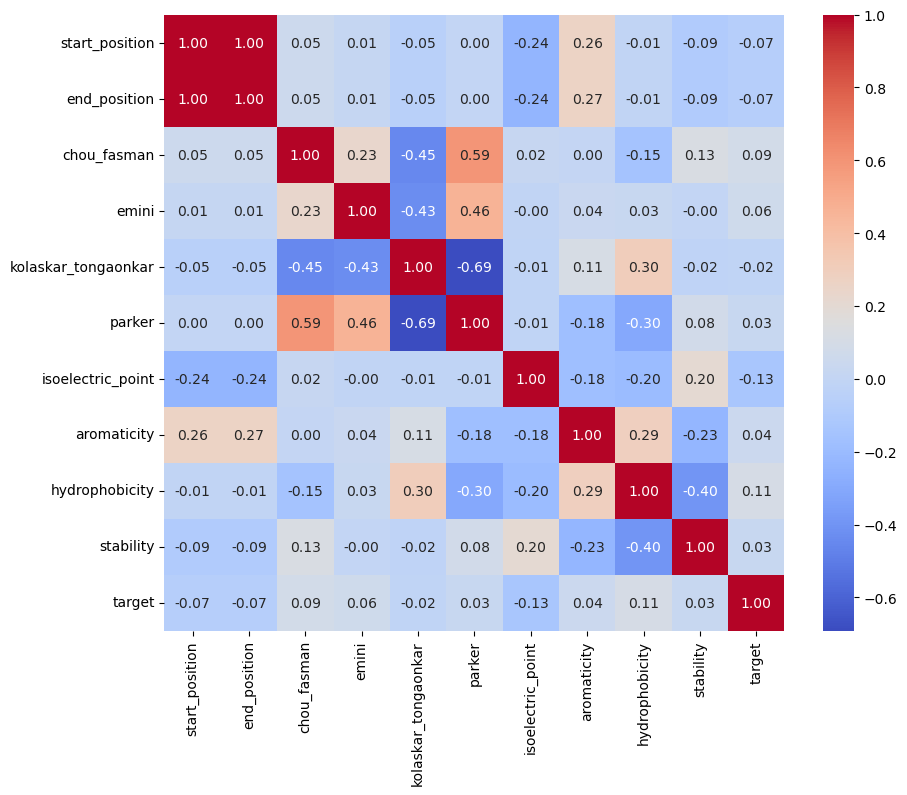

In [274]:
df_train = pd.read_csv('proteins_training_set.csv')

# Visualización de la distribución de clases
target_counts = df_train['target'].value_counts()
print(f"Total de datos con target 1: {target_counts.get(1, 0)}")
print(f"Total de datos con target 0: {target_counts.get(0, 0)}")

df_train = df_train.dropna()

# Visualización de la distribución de clases
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

df_train_balanceado = balancear(df_train, oversample=True)

X = df_train_balanceado.drop(columns=['target']).values.T
X = normalizar(X)
Y = df_train_balanceado['target'].values.reshape(1, -1)
X = np.vstack([np.ones((1, X.shape[1])), X])

n = X.shape[0]
theta = np.zeros((n, 1))
alpha = 0.1
epochs = 10000

# Entrenar
theta = gradiente_descendiente(X, Y, theta, alpha, epochs)

In [275]:
def predecir (x, theta):
  """
  Funcion de prediccion para clasificacion binaria.
  """
  probs = sigmoid(np.dot(theta.T, x))
  return (probs >= 0.5).astype(int)

In [276]:
df_tra2 = pd.read_csv('proteins_training_set.csv')
df_tra2 = df_tra2.dropna()

X_tra2 = df_tra2.drop(columns=['target']).values.T
X_tra2 = normalizar(X_tra2)
Y_tra2 = df_tra2['target'].values.reshape(1, -1)
X_tra2 = np.vstack([np.ones((1, X_tra2.shape[1])), X_tra2])

Y_pred_tra2 = predecir(X_tra2, theta)

# Evaluación
Y_true = Y_tra2.flatten()
Y_pred = Y_pred_tra2.flatten()

TP = np.sum((Y_true == 1) & (Y_pred == 1))
TN = np.sum((Y_true == 0) & (Y_pred == 0))
FP = np.sum((Y_true == 0) & (Y_pred == 1))
FN = np.sum((Y_true == 1) & (Y_pred == 0))

accuracy_tra2 = (TP + TN) / (TP + TN + FP + FN)
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

# Resultados
print("Matriz de Confusión:")
print(f"TP: {TP} | FN: {FN}")
print(f"FP: {FP} | TN: {TN}")
print(f"Precisión en prueba: {accuracy_tra2:.4f}")
print(f"Tasa de Verdaderos Positivos (TPR): {TPR:.4f}")
print(f"Tasa de Verdaderos Negativos (TNR): {TNR:.4f}")

Matriz de Confusión:
TP: 1613 | FN: 882
FP: 2772 | TN: 3937
Precisión en prueba: 0.6030
Tasa de Verdaderos Positivos (TPR): 0.6465
Tasa de Verdaderos Negativos (TNR): 0.5868


In [277]:
df_val = pd.read_csv('proteins_validation_set.csv')
df_val = df_val.dropna()

X_val = df_val.drop(columns=['target']).values.T
X_val = normalizar(X_val)
Y_val = df_val['target'].values.reshape(1, -1)
X_val = np.vstack([np.ones((1, X_val.shape[1])), X_val])

Y_pred_val = predecir(X_val, theta)

# Evaluación
Y_true = Y_val.flatten()
Y_pred = Y_pred_val.flatten()

TP = np.sum((Y_true == 1) & (Y_pred == 1))
TN = np.sum((Y_true == 0) & (Y_pred == 0))
FP = np.sum((Y_true == 0) & (Y_pred == 1))
FN = np.sum((Y_true == 1) & (Y_pred == 0))

accuracy_val = (TP + TN) / (TP + TN + FP + FN)
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

# Resultados
print("Matriz de Confusión:")
print(f"TP: {TP} | FN: {FN}")
print(f"FP: {FP} | TN: {TN}")
print(f"Precisión en prueba: {accuracy_val:.4f}")
print(f"Tasa de Verdaderos Positivos (TPR): {TPR:.4f}")
print(f"Tasa de Verdaderos Negativos (TNR): {TNR:.4f}")

Matriz de Confusión:
TP: 403 | FN: 222
FP: 714 | TN: 964
Precisión en prueba: 0.5936
Tasa de Verdaderos Positivos (TPR): 0.6448
Tasa de Verdaderos Negativos (TNR): 0.5745


In [278]:
df_test = pd.read_csv('proteins_test_set.csv')
df_test = df_test.dropna()

X_test = df_test.drop(columns=['target']).values.T
X_test = normalizar(X_test)
Y_test = df_test['target'].values.reshape(1, -1)
X_test = np.vstack([np.ones((1, X_test.shape[1])), X_test])

Y_pred_test = predecir(X_test, theta)

# Evaluación
Y_true = Y_test.flatten()
Y_pred = Y_pred_test.flatten()

TP = np.sum((Y_true == 1) & (Y_pred == 1))
TN = np.sum((Y_true == 0) & (Y_pred == 0))
FP = np.sum((Y_true == 0) & (Y_pred == 1))
FN = np.sum((Y_true == 1) & (Y_pred == 0))

accuracy_test = (TP + TN) / (TP + TN + FP + FN)
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

# Resultados
print("Matriz de Confusión:")
print(f"TP: {TP} | FN: {FN}")
print(f"FP: {FP} | TN: {TN}")
print(f"Precisión en prueba: {accuracy_test:.4f}")
print(f"Tasa de Verdaderos Positivos (TPR): {TPR:.4f}")
print(f"Tasa de Verdaderos Negativos (TNR): {TNR:.4f}")


Matriz de Confusión:
TP: 492 | FN: 289
FP: 819 | TN: 1278
Precisión en prueba: 0.6150
Tasa de Verdaderos Positivos (TPR): 0.6300
Tasa de Verdaderos Negativos (TNR): 0.6094


# Prueba 2

In [279]:
df_train = pd.read_csv('proteins_training_set.csv')

df_train = df_train.dropna()
df_train_balanceado = balancear(df_train, oversample=True)

X = df_train_balanceado.drop(columns=['emini', 'kolaskar_tongaonkar', 'parker', 'aromaticity', 'stability', 'target']).values.T
X = normalizar(X)
Y = df_train_balanceado['target'].values.reshape(1, -1)
X = np.vstack([np.ones((1, X.shape[1])), X])

n = X.shape[0]
theta = np.zeros((n, 1))
alpha = 0.1
epochs = 10000

# Entrenar
theta = gradiente_descendiente(X, Y, theta, alpha, epochs)

In [280]:
df_tra2 = pd.read_csv('proteins_training_set.csv')
df_tra2 = df_tra2.dropna()

X_tra2 = df_tra2.drop(columns=['emini', 'kolaskar_tongaonkar', 'parker', 'aromaticity', 'stability', 'target']).values.T
X_tra2 = normalizar(X_tra2)
Y_tra2 = df_tra2['target'].values.reshape(1, -1)
X_tra2 = np.vstack([np.ones((1, X_tra2.shape[1])), X_tra2])

Y_pred_tra2 = predecir(X_tra2, theta)

# Evaluación
Y_true = Y_tra2.flatten()
Y_pred = Y_pred_tra2.flatten()

TP = np.sum((Y_true == 1) & (Y_pred == 1))
TN = np.sum((Y_true == 0) & (Y_pred == 0))
FP = np.sum((Y_true == 0) & (Y_pred == 1))
FN = np.sum((Y_true == 1) & (Y_pred == 0))

accuracy_tra2 = (TP + TN) / (TP + TN + FP + FN)
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

# Resultados
print("Matriz de Confusión:")
print(f"TP: {TP} | FN: {FN}")
print(f"FP: {FP} | TN: {TN}")
print(f"Precisión en prueba: {accuracy_tra2:.4f}")
print(f"Tasa de Verdaderos Positivos (TPR): {TPR:.4f}")
print(f"Tasa de Verdaderos Negativos (TNR): {TNR:.4f}")

Matriz de Confusión:
TP: 1546 | FN: 949
FP: 2818 | TN: 3891
Precisión en prueba: 0.5907
Tasa de Verdaderos Positivos (TPR): 0.6196
Tasa de Verdaderos Negativos (TNR): 0.5800


In [281]:
df_val = pd.read_csv('proteins_validation_set.csv')
df_val = df_val.dropna()

X_val = df_val.drop(columns=['emini', 'kolaskar_tongaonkar', 'parker', 'aromaticity', 'stability', 'target']).values.T
X_val = normalizar(X_val)
Y_val = df_val['target'].values.reshape(1, -1)
X_val = np.vstack([np.ones((1, X_val.shape[1])), X_val])

Y_pred_val = predecir(X_val, theta)

# Evaluación
Y_true = Y_val.flatten()
Y_pred = Y_pred_val.flatten()

TP = np.sum((Y_true == 1) & (Y_pred == 1))
TN = np.sum((Y_true == 0) & (Y_pred == 0))
FP = np.sum((Y_true == 0) & (Y_pred == 1))
FN = np.sum((Y_true == 1) & (Y_pred == 0))

accuracy_val = (TP + TN) / (TP + TN + FP + FN)
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

# Resultados
print("Matriz de Confusión:")
print(f"TP: {TP} | FN: {FN}")
print(f"FP: {FP} | TN: {TN}")
print(f"Precisión en prueba: {accuracy_val:.4f}")
print(f"Tasa de Verdaderos Positivos (TPR): {TPR:.4f}")
print(f"Tasa de Verdaderos Negativos (TNR): {TNR:.4f}")

Matriz de Confusión:
TP: 413 | FN: 212
FP: 797 | TN: 881
Precisión en prueba: 0.5619
Tasa de Verdaderos Positivos (TPR): 0.6608
Tasa de Verdaderos Negativos (TNR): 0.5250


In [282]:
df_test = pd.read_csv('proteins_test_set.csv')
df_test = df_test.dropna()

X_test = df_test.drop(columns=['emini', 'kolaskar_tongaonkar', 'parker', 'aromaticity', 'stability', 'target']).values.T
X_test = normalizar(X_test)
Y_test = df_test['target'].values.reshape(1, -1)
X_test = np.vstack([np.ones((1, X_test.shape[1])), X_test])

Y_pred_test = predecir(X_test, theta)

# Evaluación
Y_true = Y_test.flatten()
Y_pred = Y_pred_test.flatten()

TP = np.sum((Y_true == 1) & (Y_pred == 1))
TN = np.sum((Y_true == 0) & (Y_pred == 0))
FP = np.sum((Y_true == 0) & (Y_pred == 1))
FN = np.sum((Y_true == 1) & (Y_pred == 0))

accuracy_test = (TP + TN) / (TP + TN + FP + FN)
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

# Resultados
print("Matriz de Confusión:")
print(f"TP: {TP} | FN: {FN}")
print(f"FP: {FP} | TN: {TN}")
print(f"Precisión en prueba: {accuracy_test:.4f}")
print(f"Tasa de Verdaderos Positivos (TPR): {TPR:.4f}")
print(f"Tasa de Verdaderos Negativos (TNR): {TNR:.4f}")

Matriz de Confusión:
TP: 516 | FN: 265
FP: 968 | TN: 1129
Precisión en prueba: 0.5716
Tasa de Verdaderos Positivos (TPR): 0.6607
Tasa de Verdaderos Negativos (TNR): 0.5384
